# Projeto 3: ModSim

In [1]:
# Importando as bibliotecas 

from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
from math import *

In [2]:
# Parâmetros
m= 0.1           # Massa Kg
k= (43.5*2)*3.05 # Constante da mola N/m
L= 0.225         # Tamanho inicial do elático m
g= 9.80          # Gravidade
H= 0.29          # Haste lateral m
l= 0.36          # Haste de lançamento
r= 0.02          # Raio da bola
A= pi**(r**2)    # Área da secção transversal da bola 
Cd= 0.47         # Coeficiente de arrasto
p= 1.2754        # Densidade do ar 
Peso= g*m        # peso da bolinha

In [3]:
import math
def cond_iniciais(teta):
    teta = math.radians(teta)
    h = l*math.cos(teta)     # Posição em y inicial [m]
    v0 = ((2/m)*((k/2)*((H**2 + l**2)**(1/2) - L)**2 - (k/2)*(((l*math.sin(teta))**2 + (l*math.cos(teta) - H)**2)**(1/2) - L)**2 - m*g*h))**(1/2)
    
    x0 = 0
    y0 = h
    vx0 = v0*math.cos(teta) # Velocidade em x inicial [m/s]
    vy0 = v0*math.sin(teta) # Velocidade em y inicial [m/s]
    
    return [x0,y0,vx0,vy0]

dt = 1e-3
t_lista = np.arange(0,5,dt)

In [4]:

# Implementação do modelo (a ser utilizada pela odeint)
def modelo1(X, t, teta):
    # Desagrupa lista
    x = X[0]
    y = X[1]
    vx = X[2]
    vy = X[3]    
    # Calcula as taxas de variação
    dxdt = vx
    dydt = vy
    dvxdt = -(1/m)*((1/2)*p*A*Cd*math.cos(math.radians(teta)))
    dvydt = -(1/m)*(Peso + (1/2)*p*A*Cd*math.sin(math.radians(teta)))
    # Verifica se a esfera já atingiu o chão (caso positivo para de integrar)
    if y <= 0:
        dxdt = 0
        dydt = 0
        dvxdt = 0
        dvydt = 0  
    # Agrupe lista com as taxas de variação
    dXdt = [dxdt, dydt, dvxdt, dvydt]
    # Retorna lista com as taxas de variação
    return dXdt

Alcance: 10.11
Velocidade inicial: 11.90


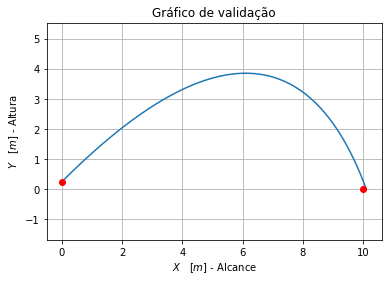

In [5]:
# Gráfico de validação
def modelo_validacao(X,t,teta):
    # Desagrupa lista
    x = X[0]
    y = X[1]
    vx = X[2]
    vy = X[3]    
    # Calcula as taxas de variação
    dxdt = vx
    dydt = vy
    dvxdt = -(1/m)*((1/2)*p*A*Cd*math.cos(math.radians(teta)))
    dvydt = -(1/m)*(Peso + (1/2)*p*A*Cd*math.sin(math.radians(teta)))
    # Verifica se a esfera já atingiu o chão (caso positivo para de integrar)
    if y <= 0:
        dxdt = 0
        dydt = 0
        dvxdt = 0
        dvydt = 0  
    # Agrupe lista com as taxas de variação
    dXdt = [dxdt, dydt, dvxdt, dvydt]
    # Retorna lista com as taxas de variação
    return dXdt

teta = 45
teta = math.radians(teta)
h = l*math.cos(teta)
v0 = ((2/m)*((k/2)*((H**2 + l**2)**(1/2) - L)**2 - (k/2)*(((l*math.sin(teta))**2 + (l*math.cos(teta) - H)**2)**(1/2) - L)**2 - m*g*h))**(1/2)
x0 = 0
y0 = h
vx0 = v0*math.cos(teta) # Velocidade em x inicial [m/s]
vy0 = v0*math.sin(teta) # Velocidade em y inicial [m/s]
X0 = [x0,y0,vx0,vy0]

x = odeint(modelo_validacao,X0,t_lista,args= (teta,) )

 

x_lista = x[:,0]
y_lista = x[:,1]
print("Alcance: {0:.2f}".format(max(x_lista)))
print("Velocidade inicial: {0:.2f}".format(v0))

plt.plot(x_lista, y_lista)
plt.title("Gráfico de validação")
plt.plot(10,0,"ro")
plt.plot(0, h, "ro")
plt.axis('equal')
plt.xlabel('$X \quad [m]$ - Alcance')
plt.ylabel('$Y \quad [m]$ - Altura')
plt.grid(True)
plt.show()

C:\Users\Rodrigo Lima\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


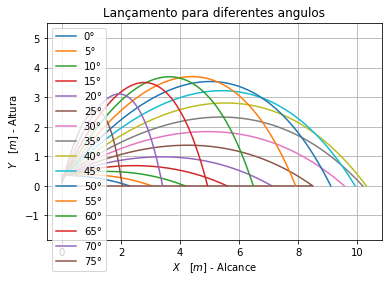

Alcance máximo: 10.31


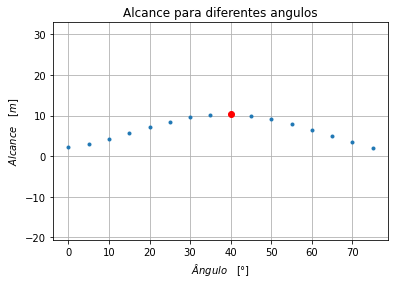

In [6]:
lista_teta = np.arange(0,80,5)
alcance = []

i=0
while i < len(lista_teta):
    
    # Lista das condições iniciais atualizadas
    X0 = cond_iniciais(lista_teta[i])
    
    # Solução através da odeint
    X_lista = odeint(modelo1, X0, t_lista, args = (lista_teta[i], ))
    
    # Desmenbrando a odeint
    x_lista = X_lista[:,0]
    y_lista = X_lista[:,1]
    
    v0 = ((X0[2])**2 + (X0[3])**2)**(1/2)
    
    # Adcionando os alcances de cada ângulo na lista 
    alcance.append(max(x_lista))
    # Plotagem do gráfico alcance x altura para cada ângulo
    plt.plot(x_lista,y_lista,label="{0}°".format(lista_teta[i]))
    
    i+=1

# Configura gráfico
plt.title('Lançamento para diferentes angulos')
plt.axis('equal')
plt.xlabel('$X \quad [m]$ - Alcance')
plt.ylabel('$Y \quad [m]$ - Altura')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico conclusivo
print("Alcance máximo: {0:.2f}".format(max(alcance)))
plt.plot(lista_teta, alcance,'.')
plt.plot(40, max(alcance), "ro")
plt.title('Alcance para diferentes angulos')
plt.axis('equal')
plt.xlabel('$Ângulo \quad [°]$')
plt.ylabel('$Alcance \quad [m]$')
plt.grid(True)
plt.show()




In [7]:
def angulo_pro_alcance_maximo(listaalcance,listaangulo):
    ang=1000
    for i,alcance in enumerate(listaalcance):
        if alcance==max(listaalcance):
            ang=listaangulo[i]
            break
    return ang,max(listaalcance)

print('Dessa forma o ângulo {0}° é o que propicia o alcance máximo de {1}'.format(angulo_pro_alcance_maximo(alcance,lista_teta)[0],angulo_pro_alcance_maximo(alcance,lista_teta)[1]))
    

Dessa forma o ângulo 40° é o que propicia o alcance máximo de 10.308904652338178


C:\Users\Rodrigo Lima\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
No handles with labels found to put in legend.


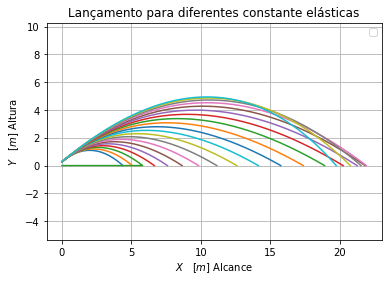

Alcance máximo: 21.92


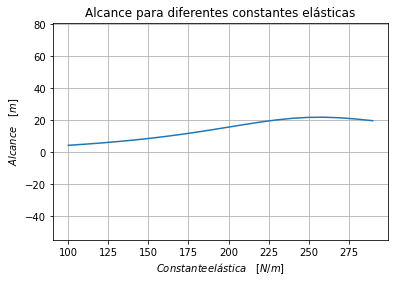

In [8]:
lista_k = np.arange(100,300,10)

alcance_1 = []


for i in lista_k:
    #################
    def cond_iniciais_1(teta,k):
        teta = math.radians(teta)
        h = l*math.cos(teta)     # Posição em y inicial [m]
        v0 = ((2/m)*((k/2)*((H**2 + l**2)**(1/2) - L)**2 - (k/2)*(((l*math.sin(teta))**2 + (l*math.cos(teta) - H)**2)**(1/2) - L)**2 - m*g*h))**(1/2)

        x0 = 0
        y0 = h
        vx0 = v0*math.cos(teta) # Velocidade em x inicial [m/s]
        vy0 = v0*math.sin(teta) # Velocidade em y inicial [m/s]
        
        return [x0,y0,vx0,vy0]
    #################
    
    # Lista das condições iniciais atualizadas
    X0 = cond_iniciais_1(40, i)
    
    # Solução através da odeint
    X_lista = odeint(modelo1, X0, t_lista, args = (i,))
    
    # Desmenbrando a odeint
    x_lista = X_lista[:,0]
    y_lista = X_lista[:,1]

    # Adcionando os alcances de cada ângulo na lista 
    alcance_1.append(max(x_lista))

    # Plotagem do gráfico materiais por alcance
    plt.plot(x_lista, y_lista)
    
    
plt.title('Lançamento para diferentes constante elásticas')
plt.axis('equal')
plt.xlabel('$X \quad [m]$ Alcance')
plt.ylabel('$Y \quad [m]$ Altura')
plt.legend()
plt.grid(True)
plt.show()


# Gráfico conclusivo
print("Alcance máximo: {0:.2f}".format(max(alcance_1)))

plt.plot(lista_k, alcance_1)
plt.title('Alcance para diferentes constantes elásticas')
plt.axis('equal')
plt.xlabel('$Constante elástica \quad [N/m]$')
plt.ylabel('$Alcance \quad [m]$')
plt.grid(True)
plt.show()